# **1. Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

In [3]:
df = pd.read_csv(r'C:\KULIAH STATISTIKA UNIVERSITAS SYIAH KUALA\SEMESTER 6\ADK\UAS ADK_Monkey-Pox\DATA MONKEYPOX.csv')
df.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,NaN,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,NaN,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [4]:
# Memeriksa Data Duplikat
print("Jumlah data duplikat : ", df.duplicated().sum())

Jumlah data duplikat :  0


In [5]:
print(df.isnull().sum())

Patient_ID                           0
Systemic Illness                  6216
Rectal Pain                          0
Sore Throat                          0
Penile Oedema                        0
Oral Lesions                         0
Solitary Lesion                      0
Swollen Tonsils                      0
HIV Infection                        0
Sexually Transmitted Infection       0
MonkeyPox                            0
dtype: int64


In [6]:
df = df.dropna()
df.shape

(18784, 11)

In [7]:
sample = df.sample(n=392, random_state=42)

# **4. Exploratory Data Analysis (EDA)**


In [8]:
# Meninjau jumlah baris dan kolom dalam dataset
print(f"Jumlah baris dan kolom: {sample.shape}")

Jumlah baris dan kolom: (392, 11)


In [9]:
# Meninjau jenis data di setiap kolom
print(f"Tipe data di setiap kolom:\n{sample.dtypes}")

Tipe data di setiap kolom:
Patient_ID                        object
Systemic Illness                  object
Rectal Pain                         bool
Sore Throat                         bool
Penile Oedema                       bool
Oral Lesions                        bool
Solitary Lesion                     bool
Swollen Tonsils                     bool
HIV Infection                       bool
Sexually Transmitted Infection      bool
MonkeyPox                         object
dtype: object



4. **Visualisasi Data**  


In [10]:
# Menampilkan nilai unik dan distribusi untuk variabel kategorikal
categorical_cols = sample.select_dtypes(include=['object', 'bool']).columns

for col in categorical_cols:
    print(f"Distribusi dari variabel {col}:")
    print(sample[col].value_counts())
    print("\n")

Distribusi dari variabel Patient_ID:
Patient_ID
P18014    1
P22495    1
P22023    1
P16795    1
P4420     1
         ..
P12561    1
P18538    1
P1428     1
P17895    1
P13579    1
Name: count, Length: 392, dtype: int64


Distribusi dari variabel Systemic Illness:
Systemic Illness
Fever                    148
Swollen Lymph Nodes      135
Muscle Aches and Pain    109
Name: count, dtype: int64


Distribusi dari variabel Rectal Pain:
Rectal Pain
False    203
True     189
Name: count, dtype: int64


Distribusi dari variabel Sore Throat:
Sore Throat
False    216
True     176
Name: count, dtype: int64


Distribusi dari variabel Penile Oedema:
Penile Oedema
True     200
False    192
Name: count, dtype: int64


Distribusi dari variabel Oral Lesions:
Oral Lesions
True     198
False    194
Name: count, dtype: int64


Distribusi dari variabel Solitary Lesion:
Solitary Lesion
True     211
False    181
Name: count, dtype: int64


Distribusi dari variabel Swollen Tonsils:
Swollen Tonsils
False    216

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\1442085002.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sample, palette=color_palette)  # Menggunakan seluruh palette
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\1442085002.py:22: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(x=col, data=sample, palette=color_palette)  # Menggunakan seluruh palette
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\1442085002.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sample, palette=color_palette)  # Menggunakan seluruh palette
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\1442085002.py:22: U

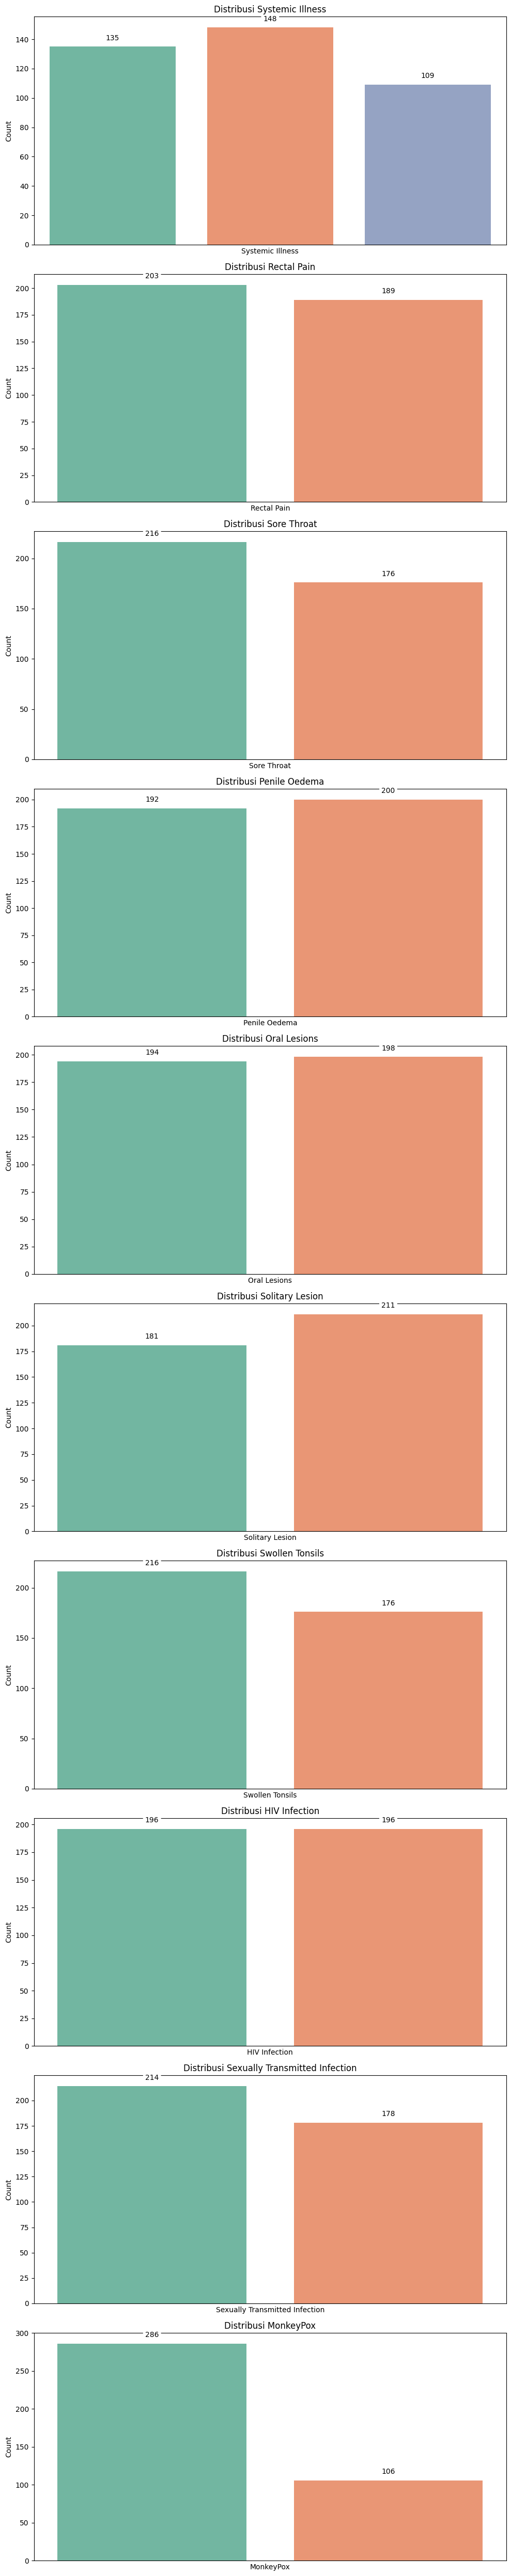

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Mengambil kolom kategorikal
categorical_cols = sample.select_dtypes(include=['object', 'bool']).columns

# Menghapus kolom 'Patient_ID' dari daftar kolom kategorikal
categorical_cols = [col for col in categorical_cols if col != 'Patient_ID']

# Daftar warna berbeda untuk setiap plot
color_palette = sns.color_palette("Set2", len(categorical_cols))

n_cols = 1  # Menentukan jumlah kolom untuk subplot (1 kolom)
n_rows = len(categorical_cols)  # Menentukan jumlah baris sesuai banyaknya kolom kategorikal

# Membuat visualisasi bar chart untuk setiap kolom kategorikal
plt.figure(figsize=(10, 5 * n_rows))  # Ukuran figure disesuaikan dengan jumlah baris

for i, col in enumerate(categorical_cols, 1):
    ax = plt.subplot(n_rows, n_cols, i)  # Menyesuaikan posisi subplot untuk 1 kolom dan banyak baris
    sns.countplot(x=col, data=sample, palette=color_palette)  # Menggunakan seluruh palette
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)  # Menambahkan label untuk sumbu X
    plt.ylabel('Count')  # Menambahkan label untuk sumbu Y
    plt.xticks(rotation=45)  # Memutar label sumbu X agar tidak tumpang tindih
    
    # Menghapus label pada sumbu X
    plt.xticks([])  # Menghilangkan nama variabel di sumbu X

    # Menambahkan nilai di atas setiap bar
    for p in ax.patches:
        height = int(p.get_height())  # Membuat nilai bulat
        ax.annotate(f'{height}',  # Nilai dari setiap bar
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi nilai di atas bar
                    ha='center', va='bottom',  # Penyusunan horizontal dan vertikal
                    xytext=(0, 7),  # Jarak dari bar
                    textcoords='offset points',
                    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))  # Bounding box

plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\1404583840.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="pastel", edgecolor="black", ax=ax)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\1404583840.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\1404583840.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="pastel", edgecolor="black", ax=ax)
C:\Users\ASUS\AppData\Local\Tem

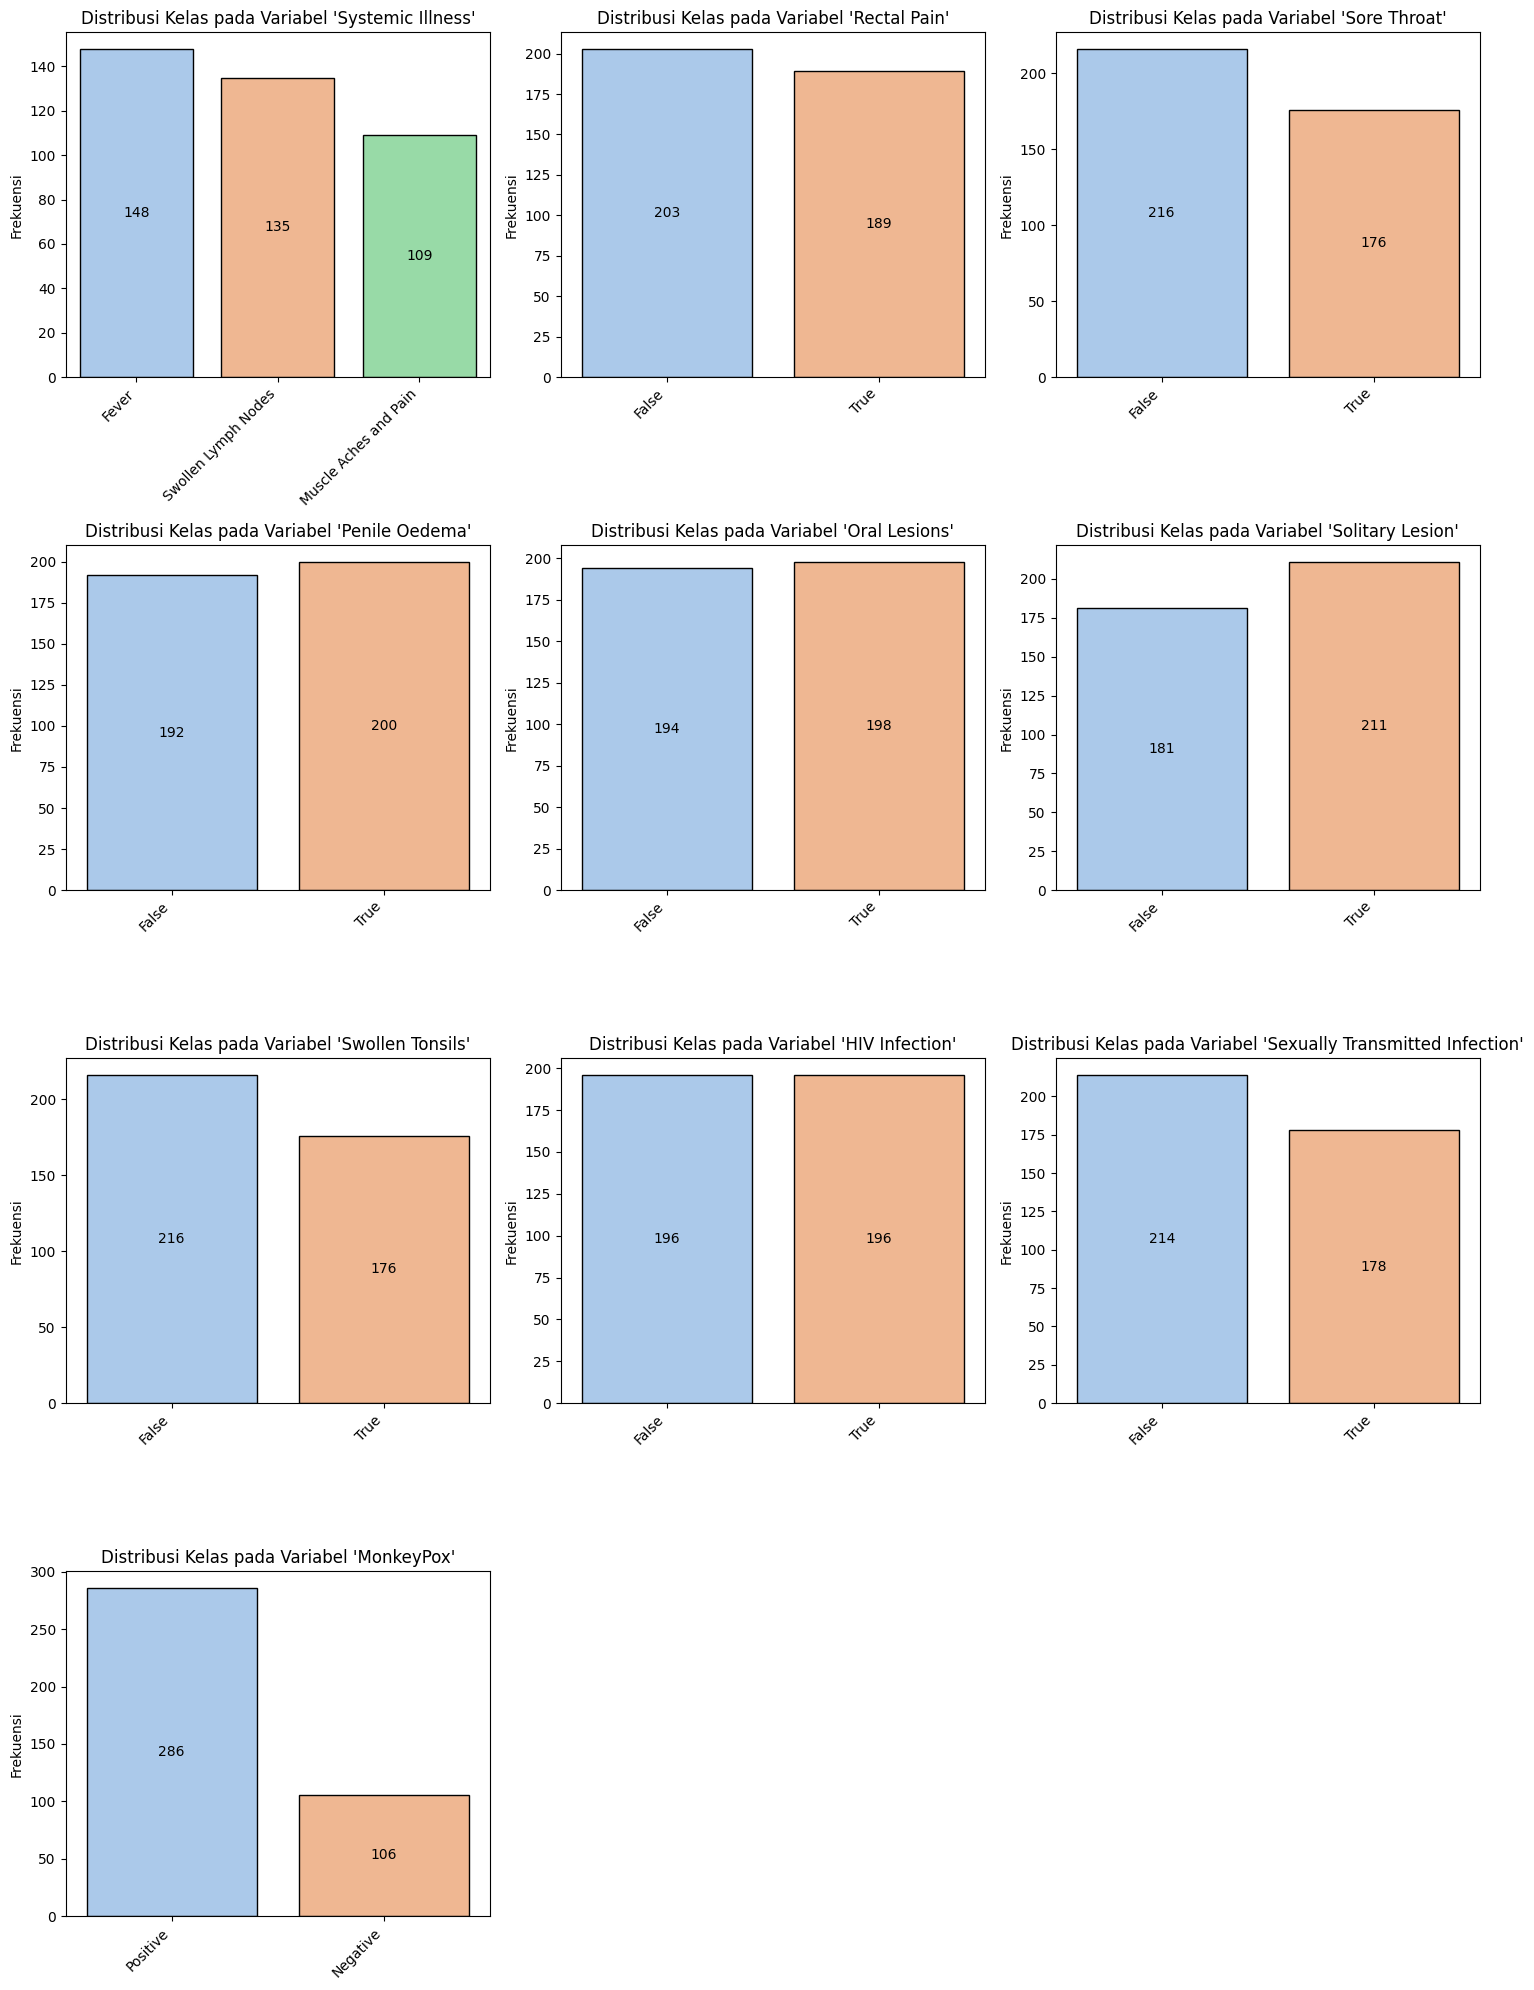

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'sample' is your DataFrame and contains the variables you want to plot
# Replace these variable names with your actual column names (ensure there are no extra spaces)
variables = ['Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 
             'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox']

# Set up a 4x3 grid for subplots (4 rows, 3 columns), but only use as many axes as needed
fig, axes = plt.subplots(4, 3, figsize=(15, 20))

# Loop through the variables and plot each one on the corresponding subplot
for i, var in enumerate(variables):
    ax = axes[i//3, i%3]  # Select the correct subplot
    
    # Filter out categories with no data by removing zeros in the count
    cleaned_data = sample[var].dropna()
    value_counts = cleaned_data.value_counts()

    # Remove categories with zero count
    value_counts = value_counts[value_counts > 0]
    
    # Plot the count plot
    sns.barplot(x=value_counts.index, y=value_counts.values, palette="pastel", edgecolor="black", ax=ax)
    
    ax.set_title(f"Distribusi Kelas pada Variabel '{var}'")
    ax.set_ylabel('Frekuensi')
    
    # Rotate x-axis labels by 45 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Remove the x-axis label (xlabel)
    ax.set_xlabel('')
    
    # Add value labels at the center of each bar
    for p in ax.patches:  # Loop through each bar in the plot
        height = p.get_height()  # Get the height of the bar (count value)
        width = p.get_width()  # Get the width of the bar (count value for each category)
        x_position = p.get_x() + width / 2  # Calculate the x position to center the label
        y_position = height / 2  # Position the label vertically in the middle of the bar
        
        # Add the text label (rounded to integer)
        ax.text(x_position, y_position, f'{int(height)}', ha='center', va='center', color='black')

# Remove any extra subplots (axes) that are not used
for j in range(i + 1, 12):  # Remove axes from the 11th subplot onward
    fig.delaxes(axes[j//3, j%3])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [ ]:
sample.to_csv("C:/KULIAH STATISTIKA UNIVERSITAS SYIAH KUALA/SEMESTER 6/ADK/UAS ADK_Monkey-Pox/sample.csv")